# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Laode Fahmi Hidayat
- **Email:** Bayubulan659@gmail.com
- **ID Dicoding:** MC208D5Y1125

## Menentukan Pertanyaan Bisnis

- Station Mana yang memiliki tingka udarah terburuk?
- Tahun Berapa yang memiliki tingkat udarah yang paling buruh dan berdasarkan data apa yang paling mempengaruinya

## Import Semua Packages/Library yang Digunakan

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import gdown
import io
import zipfile
import re


## Data Wrangling

In [ ]:

file_id = "1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr"
url = f"https://drive.google.com/uc?id={file_id}"

file_content = gdown.download(url, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: /content/Air-quality-dataset.zip
100%|██████████| 7.96M/7.96M [00:00<00:00, 28.5MB/s]


### Gathering Data

In [ ]:
zip_content = io.BytesIO()
gdown.download(url, zip_content, quiet=False)

with zipfile.ZipFile(zip_content, 'r') as zip_ref:
    file_list = zip_ref.namelist()
    data_arrays = {}
    for file_name in file_list:
        if file_name.endswith('.csv'):
            with zip_ref.open(file_name) as file:
                df = pd.read_csv(file)
                data_arrays[file_name] = df

for file, array in data_arrays.items():
    print(f"File: {file}, Shape: {array.shape}")

Downloading...
From: https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: <_io.BytesIO object at 0x7a0b647275b0>
100%|██████████| 7.96M/7.96M [00:00<00:00, 30.5MB/s]


File: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv, Shape: (35064, 18)
File: PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv, Shape: (35064, 18)
File: PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv, Shape: (35064, 18)
File: PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv, Shape: (35064, 18)
File: PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv, Shape: (35064, 18)
File: PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv, Shape: (35064, 18)
File: PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv, Shape: (35064, 18)
File: PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv, Shape: (35064, 18)
File: PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv, Shape: (35064, 18)
File: PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv, Shape: (35064, 18)
File: PRSA_Data_20130301-20170228/PRSA_Data_Wanl

In [ ]:

all_data = []
for file, array in data_arrays.items():
    match = re.search(r"PRSA_Data_(\w+)_", file)
    if match:
        city = match.group(1)
    else:
        city = "Unknown"

    array['City'] = city
    all_data.append(array)

combined_df = pd.concat(all_data, ignore_index=True)

combined_df.head()
combined_df.shape

(420768, 19)

In [ ]:
combined_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,City
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Aotizhongxin


**Insight:**
- 19
- 420768


### Assessing Data

In [ ]:
def melakukan_eksplor(data_arrays):

    data_arrays.info()
    duplikat = data_arrays.duplicated().sum()
    nan = data_arrays.isna().sum().sum()
    macam_nan = (data_arrays.isna().sum() / len(data_arrays) * 100).round(2)
    # persentase_nan = data_arrays.isna().sum() / data_arrays.size * 100
    # print(f"Persentase total NaN: {persentase_nan:.2f}%")

    print(f"Jumlah data duplikat: {duplikat}")
    print(f"Jumlah data NaN: {nan}")
    if duplikat > 0 and nan > 0 :
        print(" tidak aman")
    elif duplikat > 0 and nan == 0 :
        print(" ada duplikat")
    elif duplikat == 0 and nan > 0 :
        print(" ada NaN")
        print(macam_nan)
    else:
        print(" aman")



In [ ]:
melakukan_eksplor(combined_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
 18  City     420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 61.0+ MB
Jumlah

Data yang sudah di gabungkan dicek dan ternyata memiliki beberapa nan yang ada pada colom di antaranya kolom PM2.5, PM10, SO2,NO2, CO,
O3, TEMP, PRES, DEWP, RAIN, wd, WSPM namun dengan presentase yang rendah dengan yang paling tinggi CO dengan 4.92 %

In [ ]:
for file, array in data_arrays.items():
    print(f"File: {file}")
    melakukan_eksplor(array)

File: PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
 18  City     35064 non-null  object 
dtypes: float6

mengecek apakah ada station yang bersih tanpa adanya data kosong dan hasilnya tidak ada

In [ ]:
def print_na_rows(df, column_names):
    for col in column_names:
        print(f"Missing values in column '{col}':")
        print(df[df[col].isna()])
        print("-" * 20)

column_names = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']
print_na_rows(combined_df, column_names)

Missing values in column 'PM2.5':
           No  year  month  day  hour  PM2.5   PM10      SO2      NO2      CO  \
1509     1510  2013      5    2    21    NaN  183.0  63.0000  93.0000  1200.0   
1837     1838  2013      5   16    13    NaN   98.0  46.0000  35.0000   600.0   
2368     2369  2013      6    7    16    NaN  137.0  12.0000  74.0000  2500.0   
2785     2786  2013      6   25     1    NaN   35.0   3.1416  35.1063     NaN   
2808     2809  2013      6   26     0    NaN  183.0  64.2600  40.0335     NaN   
...       ...   ...    ...  ...   ...    ...    ...      ...      ...     ...   
420696  34993  2017      2   26     0    NaN    NaN      NaN      NaN     NaN   
420709  35006  2017      2   26    13    NaN    NaN      NaN      NaN     NaN   
420731  35028  2017      2   27    11    NaN    NaN      NaN      NaN     NaN   
420732  35029  2017      2   27    12    NaN    NaN      NaN      NaN     NaN   
420733  35030  2017      2   27    13    NaN    NaN      NaN      NaN     N

mencoba melihat data kosong tersebut

In [ ]:
columns_to_check = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


print("\nDescriptive Statistics for Specified Columns:")
print(combined_df[columns_to_check].describe())


Descriptive Statistics for Specified Columns:
               PM2.5           PM10            SO2            NO2  \
count  412029.000000  414319.000000  411747.000000  408652.000000   
mean       79.793428     104.602618      15.830835      50.638586   
std        80.822391      91.772426      21.650603      35.127912   
min         2.000000       2.000000       0.285600       1.026500   
25%        20.000000      36.000000       3.000000      23.000000   
50%        55.000000      82.000000       7.000000      43.000000   
75%       111.000000     145.000000      20.000000      71.000000   
max       999.000000     999.000000     500.000000     290.000000   

                  CO             O3           TEMP           PRES  \
count  400067.000000  407491.000000  420370.000000  420375.000000   
mean     1230.766454      57.372271      13.538976    1010.746982   
std      1160.182716      56.661607      11.436139      10.474055   
min       100.000000       0.214200     -19.900000     

mencoba melihat statistika dari data dan menentukan outlier dan terdapat beberapa outlayer pada kolom-kolom di atas

In [ ]:
combined_df.shape

(420768, 19)

**Insight:**
- 420768
- 16

### Cleaning Data

In [ ]:
print(combined_df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
City        object
dtype: object


mengecek tipe data yang ada di atas dan menetukan metode pengisian nan

In [ ]:
combined_df[columns_to_check] = combined_df[columns_to_check].apply(
    lambda x: x.interpolate(method='linear', limit_direction='forward')
)

melakukan pengisian nilai nan dengan metode Interpolasi Linear pada kolom yang ada pada coloums_to_check

In [ ]:
print(combined_df["wd"].isna().sum())
combined_df["wd"].value_counts()

1822


,count
wd,
NE,43335
ENE,34142
NW,32600
N,30869
E,29752
SW,28756
NNE,28232
NNW,25326
WNW,24375


In [ ]:
combined_df.fillna(value="NE", inplace=True)

karena wd itu paling banyak NE maka saya mengisinya dengan NE untuk nilai kosong karena cenderung kecil

In [ ]:
melakukan_eksplor(combined_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
 18  City     420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 61.0+ MB
Jumlah

In [ ]:
combined_df['datetime'] = pd.to_datetime(combined_df[['year', 'month', 'day', 'hour']])
combined_df = combined_df.drop(columns=['year', 'month', 'day', 'hour'])

print(combined_df.head())

   No  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
0   1    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   
1   2    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   
2   3    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   
3   4    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   
4   5    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   

   WSPM       station          City            datetime  
0   4.4  Aotizhongxin  Aotizhongxin 2013-03-01 00:00:00  
1   4.7  Aotizhongxin  Aotizhongxin 2013-03-01 01:00:00  
2   5.6  Aotizhongxin  Aotizhongxin 2013-03-01 02:00:00  
3   3.1  Aotizhongxin  Aotizhongxin 2013-03-01 03:00:00  
4   2.0  Aotizhongxin  Aotizhongxin 2013-03-01 04:00:00  


mengabungkan parameter waktu semuanya dalam kolom datetime dan mengubahnya menjadi tipe datetime

In [ ]:
def pakai_iqr(df, column_names):

    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        maximum = Q3 + (1.5 * IQR)
        minimum = Q1 - (1.5 * IQR)

        kondisi_lower_than = df[column] < minimum
        kondisi_more_than = df[column] > maximum

        df[column] = df[column].mask(kondisi_more_than, maximum)
        df[column] = df[column].mask(kondisi_lower_than, minimum)

    return df

In [ ]:
columns_to_modify = ["PM2.5", "PM10", "SO2", "NO2", "O3"]

combined_df = pakai_iqr(combined_df, columns_to_modify)

melakukan pengecekan outlier dan mencoba menghilangkannya dengan metode Imputation

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   PM2.5     420768 non-null  float64       
 2   PM10      420768 non-null  float64       
 3   SO2       420768 non-null  float64       
 4   NO2       420768 non-null  float64       
 5   CO        420768 non-null  float64       
 6   O3        420768 non-null  float64       
 7   TEMP      420768 non-null  float64       
 8   PRES      420768 non-null  float64       
 9   DEWP      420768 non-null  float64       
 10  RAIN      420768 non-null  float64       
 11  wd        420768 non-null  object        
 12  WSPM      420768 non-null  float64       
 13  station   420768 non-null  object        
 14  City      420768 non-null  object        
 15  datetime  420768 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int

In [ ]:
city_station_discrepancies = combined_df[combined_df['City'] != combined_df['station']]

if not city_station_discrepancies.empty:
    print("There are discrepancies between 'City' and 'station' columns:")
    print(city_station_discrepancies[['City', 'station']])
else:
    print("No discrepancies found between 'City' and 'station' columns.")


No discrepancies found between 'City' and 'station' columns.


In [ ]:
combined_df.drop(columns=["City"], inplace=True)

In [ ]:
combined_df.shape

(420768, 15)

In [ ]:
combined_df["datetime"].describe()

,datetime
count,420768
mean,2015-03-01 11:30:00.000001024
min,2013-03-01 00:00:00
25%,2014-03-01 05:45:00
50%,2015-03-01 11:30:00
75%,2016-02-29 17:15:00
max,2017-02-28 23:00:00


Menghilangakn Kolom city karena sama persisi dengan station

**Insight:**
- 420768
- 15

## Exploratory Data Analysis (EDA)

In [ ]:
combined_df.groupby(by="City").agg({
    "No": "nunique"
    , "PM2.5": ["max", "min", "mean", "std"]
    , "PM10": ["max", "min", "mean", "std"]
    , "SO2": ["max", "min", "mean", "std"]
    , "NO2": ["max", "min", "mean", "std"]
    , "CO": ["max", "min", "mean", "std"]
    , "O3": ["max", "min", "mean", "std"]
    , "TEMP": ["max", "min", "mean", "std"]
    , "PRES": ["max", "min", "mean", "std"]
    , "DEWP": ["max", "min", "mean", "std"]
    , "RAIN": ["max", "min", "mean", "std"]
    , "WSPM": ["max", "min", "mean", "std"]
    , "wd": ["max", "min", "mean", "std"]
})

### Explore Tanggal Pesebarang Udarah pada beberapa kota di 2013-2017


In [ ]:
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])
combined_df_2013 = combined_df[combined_df['datetime'].dt.year == 2013]
combined_df_2014 = combined_df[combined_df['datetime'].dt.year == 2014]
combined_df_2015 = combined_df[combined_df['datetime'].dt.year == 2015]
combined_df_2016 = combined_df[combined_df['datetime'].dt.year == 2016]
combined_df_2017 = combined_df[combined_df['datetime'].dt.year == 2017]

In [ ]:
combined_df_indexing = combined_df.set_index("datetime", drop=False)


In [ ]:
combined_df_indexing['datetime'] = pd.to_datetime(combined_df_indexing['datetime'])
combined_df_indexing_2013 = combined_df_indexing[combined_df_indexing['datetime'].dt.year == 2013]
combined_df_indexing_2014 = combined_df_indexing[combined_df_indexing['datetime'].dt.year == 2014]
combined_df_indexing_2015 = combined_df_indexing[combined_df_indexing['datetime'].dt.year == 2015]
combined_df_indexing_2016 = combined_df_indexing[combined_df_indexing['datetime'].dt.year == 2016]
combined_df_indexing_2017 = combined_df_indexing[combined_df_indexing['datetime'].dt.year == 2017]

In [ ]:
air_quality_columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

def melihat_tren(combined_df, air_quality_columns):
    import matplotlib.pyplot as plt

    if "datetime" in combined_df.columns:
        combined_df = combined_df.set_index("datetime")

    combined_df_daily = combined_df[air_quality_columns].resample("D").mean()

    plt.figure(figsize=(12, 6))
    for col in air_quality_columns:
        plt.plot(combined_df_daily.index, combined_df_daily[col], label=col, linewidth=1.5)

    plt.title("Tren Kandungan Udara dari Waktu ke Waktu", fontsize=16)
    plt.xlabel("Waktu", fontsize=12)
    plt.ylabel("Kandungan Udara", fontsize=12)
    plt.legend(title="Parameter Udara", loc="upper right", fontsize=10, bbox_to_anchor=(1.2, 1))
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.5)

    plt.show()




In [ ]:
combined_df_indexing_2013

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
datetime,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,7340,21.0,81.0,5.0,47.0,600.0,22.0,7.2,1007.3,-16.3,0.0,W,1.2,Wanshouxigong,2013-12-31 19:00:00
2013-12-31 20:00:00,7341,21.0,81.0,5.0,47.0,700.0,7.0,2.8,1007.8,-14.9,0.0,WNW,0.4,Wanshouxigong,2013-12-31 20:00:00
2013-12-31 21:00:00,7342,26.0,105.0,8.0,74.0,800.0,1.0,3.5,1008.0,-15.2,0.0,WSW,2.6,Wanshouxigong,2013-12-31 21:00:00


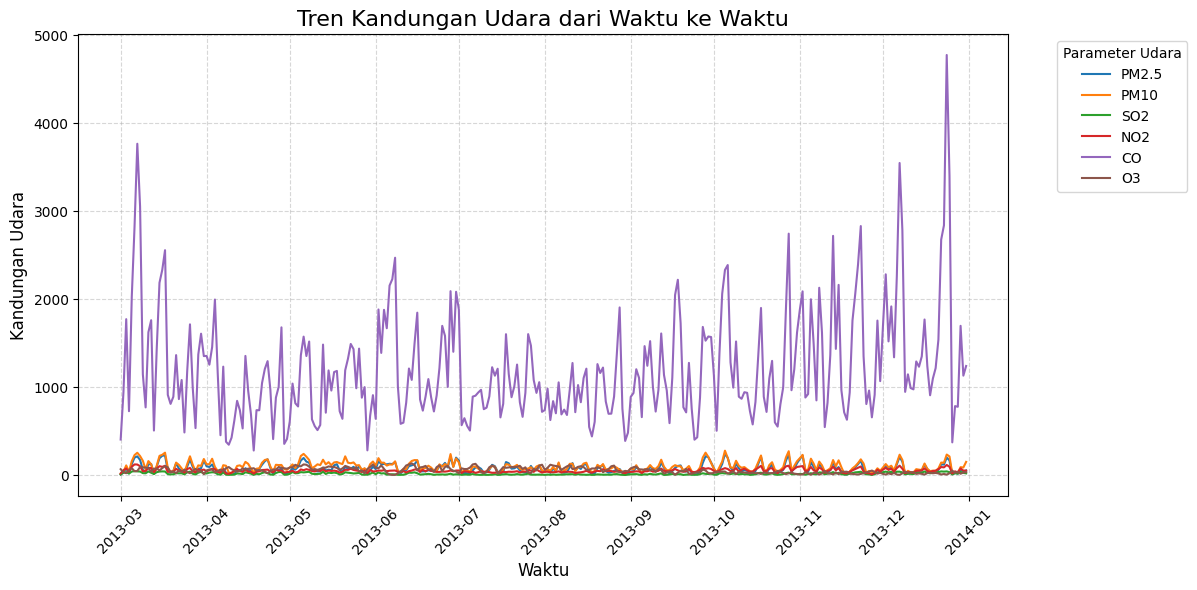

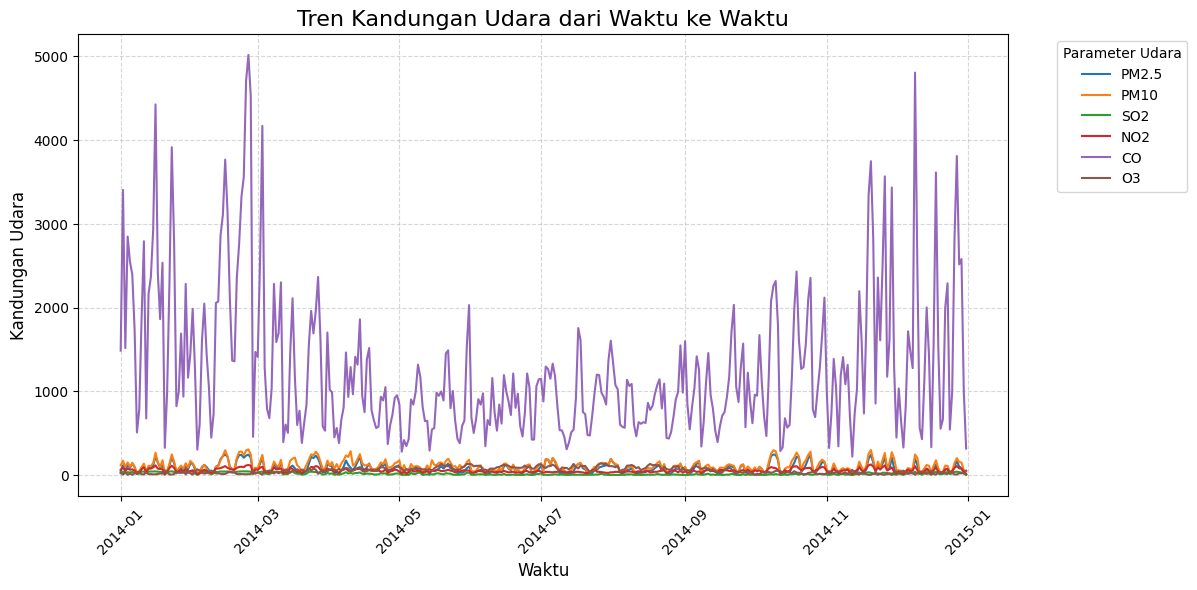

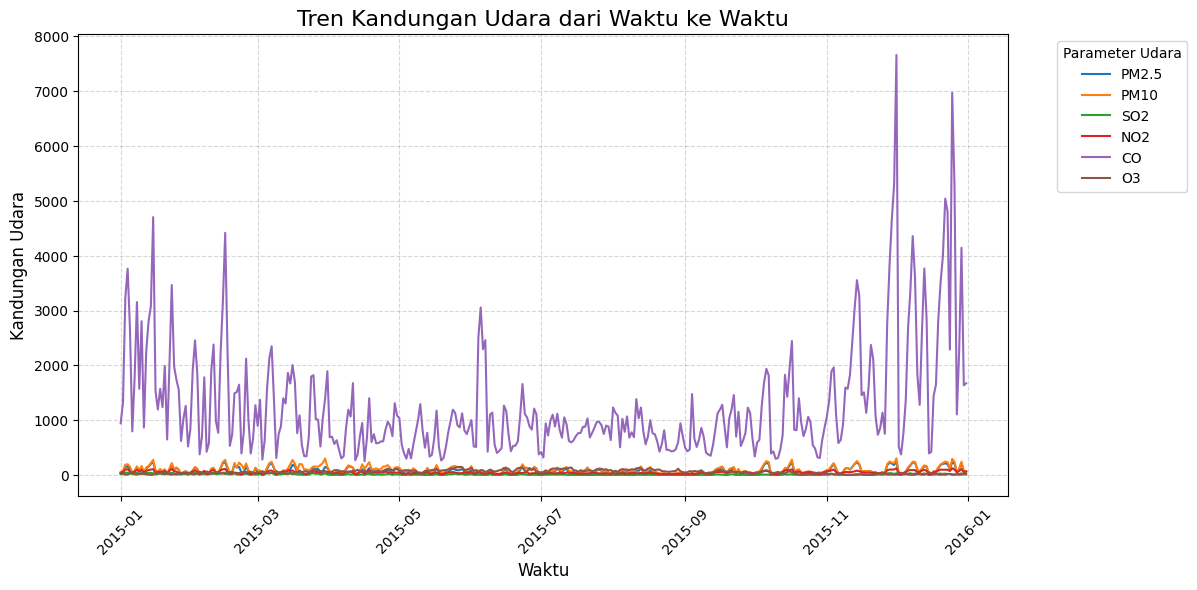

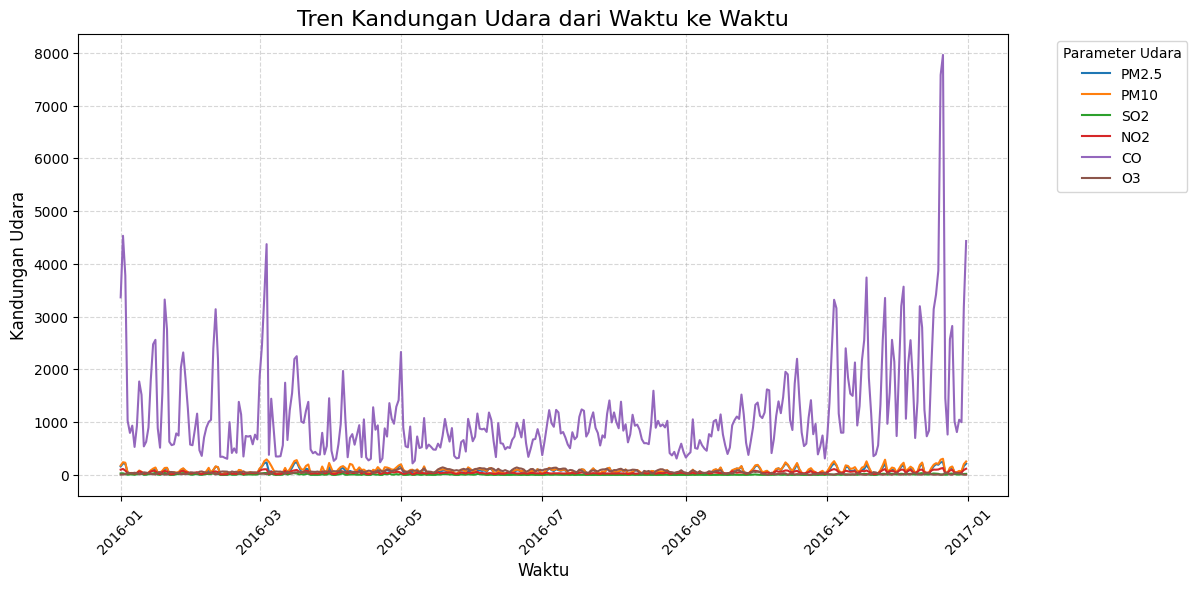

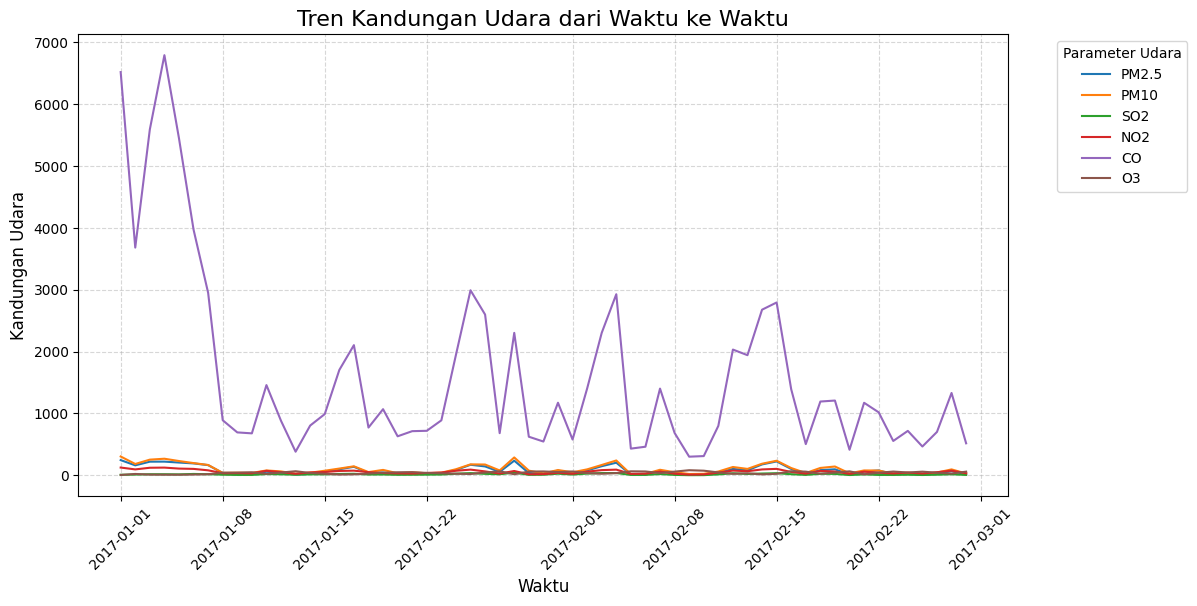

In [ ]:
melihat_tren(combined_df_indexing_2013, air_quality_columns)
melihat_tren(combined_df_indexing_2014, air_quality_columns)
melihat_tren(combined_df_indexing_2015, air_quality_columns)
melihat_tren(combined_df_indexing_2016, air_quality_columns)
melihat_tren(combined_df_indexing_2017, air_quality_columns)


In [ ]:
combined_df.shape

(420768, 15)

melihat bagaimana persebran kualitas udarah pada beberapa kota yang ada

**Insight:**
- 420768
- 17

## Visualization & Explanatory Analysis

### Pertanyaan 1: Station Mana yang memiliki tingka udarah terburuk? serta faktor apa yang paling besar mempengarui kondisi di station itu pada tahun 2016

In [ ]:
combined_df_2016 = combined_df[combined_df["datetime"].dt.year == 2016]

station_pollution_avg = combined_df_2016.groupby("station")[air_quality_columns].mean()
worst_station = station_pollution_avg.mean(axis=1).idxmax()
worst_station_df = combined_df_2016[combined_df_2016["station"] == worst_station]

print(f"Stasiun dengan kualitas udara terburuk di 2016: {worst_station}")


Stasiun dengan kualitas udara terburuk di 2016: Dongsi


In [ ]:
station_pollution_avg[air_quality_columns].mean(axis=1)
station_pollution_avg

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,71.034874,91.640653,10.117771,48.043545,1190.215164,59.829823
Changping,60.055726,84.753245,8.006432,45.349670,1129.764344,52.783925
Dingling,59.442561,78.936589,7.078438,25.290073,870.810565,69.646544
Dongsi,75.959415,98.453210,10.941058,50.346425,1236.429872,56.600022
Guanyuan,73.712261,101.402550,10.947860,53.091473,1168.169399,53.637466
Gucheng,73.776582,107.420936,9.740836,49.418545,1170.952869,57.630692
Huairou,59.187443,80.399419,6.548668,27.249374,927.977004,51.845875
Nongzhanguan,72.651924,93.910974,10.922738,52.302140,1209.369308,58.489792
Shunyi,68.891735,85.690530,9.158925,42.400501,1099.948770,52.259882


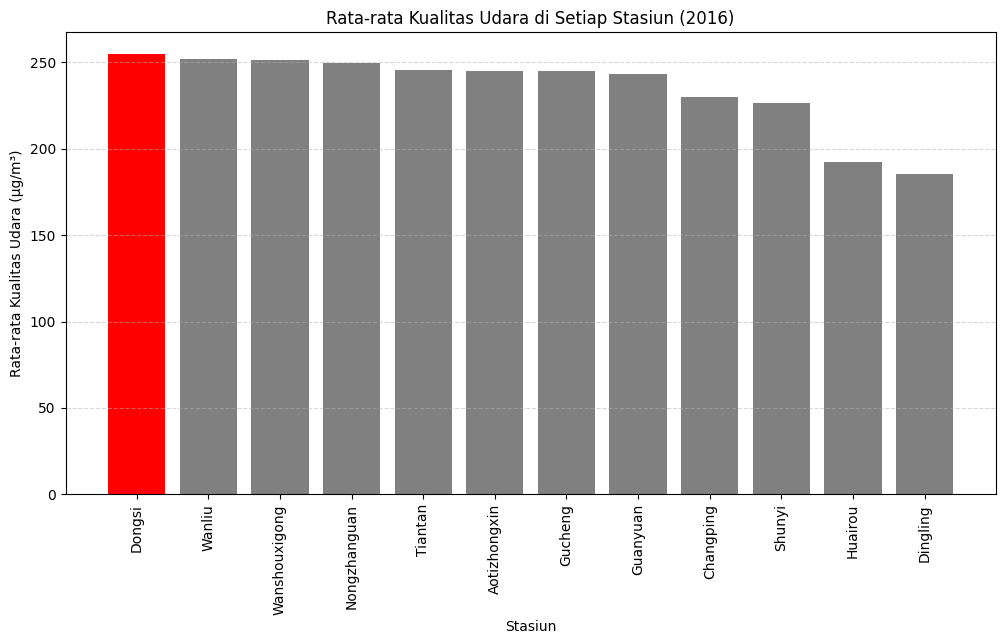

Stasiun dengan kualitas udara terburuk di 2016: Dongsi


In [ ]:

station_pollution_avg = combined_df_2016.groupby("station")[air_quality_columns].mean()
station_pollution_avg["Overall_Average"] = station_pollution_avg.mean(axis=1)

station_pollution_avg_sorted = station_pollution_avg.sort_values("Overall_Average", ascending=False)

worst_station = station_pollution_avg_sorted.index[0]

plt.figure(figsize=(12, 6))
plt.bar(station_pollution_avg_sorted.index, station_pollution_avg_sorted["Overall_Average"], color="gray")
plt.bar(worst_station, station_pollution_avg_sorted.loc[worst_station, "Overall_Average"], color="red")  # Highlight terburuk
plt.xticks(rotation=90)
plt.xlabel("Stasiun")
plt.ylabel("Rata-rata Kualitas Udara (µg/m³)")
plt.title("Rata-rata Kualitas Udara di Setiap Stasiun (2016)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

print(f"Stasiun dengan kualitas udara terburuk di 2016: {worst_station}")

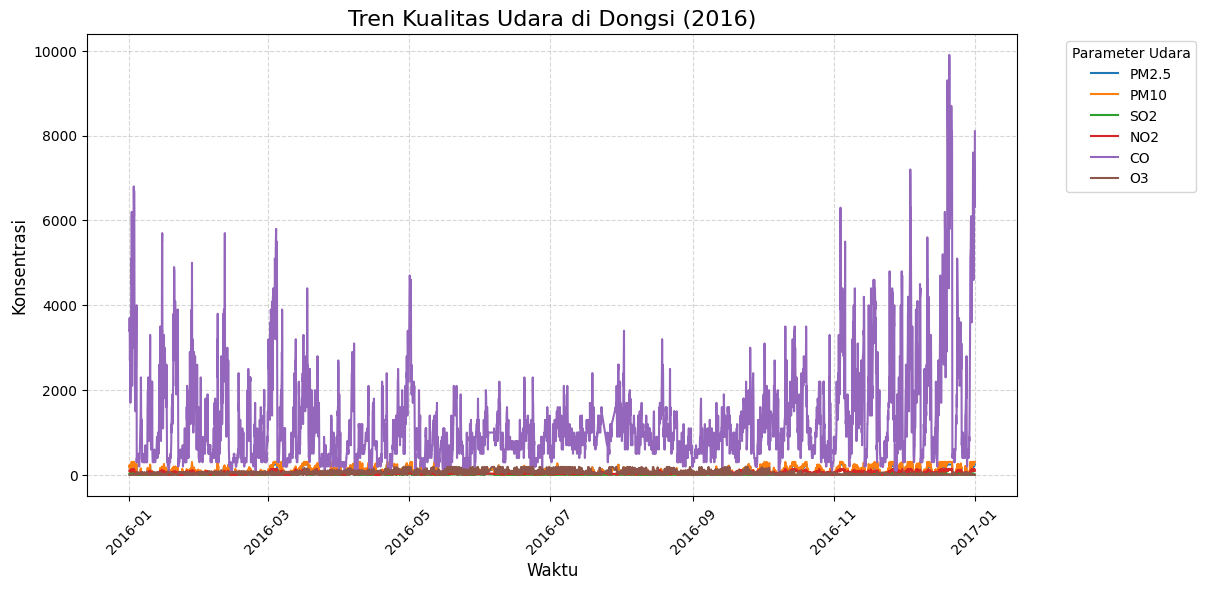

In [ ]:
plt.figure(figsize=(12, 6))

for col in air_quality_columns:
    plt.plot(worst_station_df["datetime"], worst_station_df[col], label=col, linewidth=1.5)

plt.title(f"Tren Kualitas Udara di {worst_station} (2016)", fontsize=16)
plt.xlabel("Waktu", fontsize=12)
plt.ylabel("Konsentrasi", fontsize=12)
plt.legend(title="Parameter Udara", loc="upper right", fontsize=10, bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


Dapat dilihat bahwa setelah menhitung rata-rata kualitas udarah yang ada di station dangsi menunjukan bahwa CO memiliki nilai tertinggi di antara polusi-polusi lainnya  

### Pertanyaan 2: Tahun Berapa yang memiliki tingkat udarah yang paling buruh dan berdasarkan data apa yang paling mempengaruinya

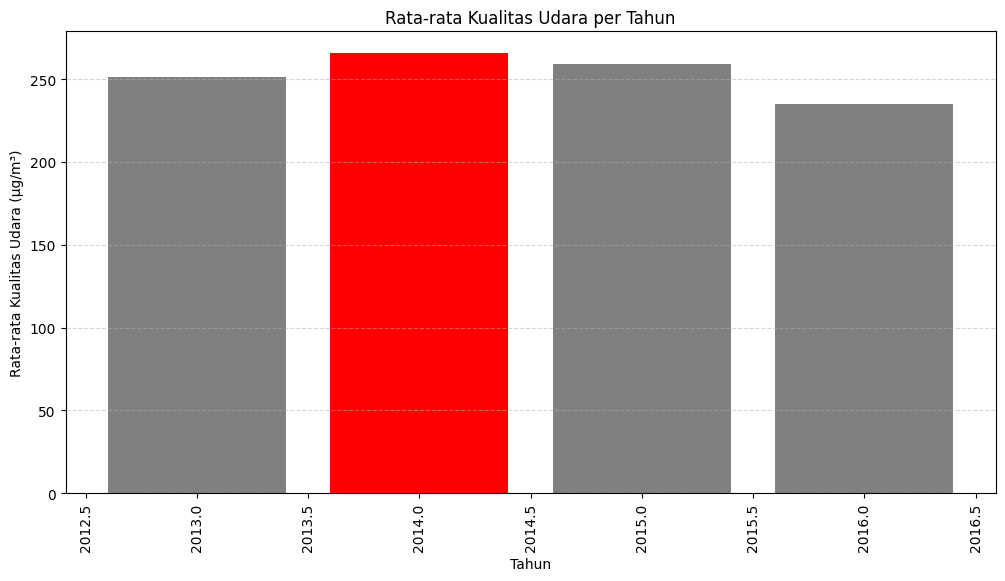

Tahun dengan kualitas udara terburuk: 2014


In [ ]:

combined_df["year"] = combined_df["datetime"].dt.year

yearly_pollution_avg = combined_df.groupby("year")[air_quality_columns].mean()

yearly_pollution_avg["Overall_Average"] = yearly_pollution_avg.mean(axis=1)

yearly_pollution_avg = yearly_pollution_avg.sort_values("Overall_Average", ascending=False)

worst_year = yearly_pollution_avg[yearly_pollution_avg.index != 2017]["Overall_Average"].idxmax()

yearly_pollution_avg = yearly_pollution_avg[yearly_pollution_avg.index != 2017]

plt.figure(figsize=(12, 6))
plt.bar(yearly_pollution_avg.index, yearly_pollution_avg["Overall_Average"], color="gray")
plt.bar(worst_year, yearly_pollution_avg.loc[worst_year, "Overall_Average"], color="red")
plt.xticks(rotation=90)
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Kualitas Udara (µg/m³)")
plt.title("Rata-rata Kualitas Udara per Tahun")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

print(f"Tahun dengan kualitas udara terburuk: {worst_year}")


Dengan membandingkan niali rata-rata kulitas udarah yang ada di seluruh station pada setiap tahun kecuali 2017 (karena data nya tidak lengkap) maka dapat disimpulkan bahwa pada tahun 2014 lah rata-rata tingkat pencemaran udarah paling tinggi  

In [ ]:
combined_df["Rata-Rata Kualitas Udarah"] = combined_df[air_quality_columns].mean(axis=1)
combined_df.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,year,Rata-Rata Kualitas Udarah
0,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,2013,66.000000
1,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,2013,67.333333
2,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,2013,67.000000
3,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,2013,67.666667
4,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,2013,67.000000


In [ ]:
combined_df_2014 = combined_df[combined_df["datetime"].dt.year == 2014]

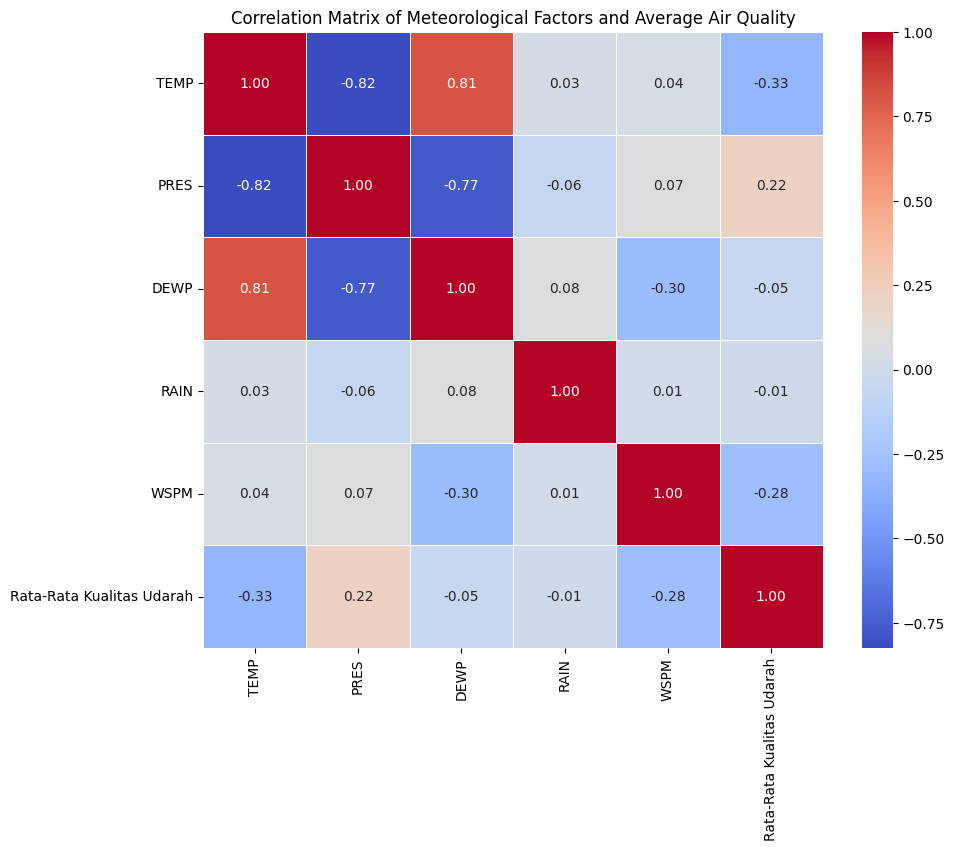

In [ ]:
correlation_matrix = combined_df_2014[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'Rata-Rata Kualitas Udarah']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Meteorological Factors and Average Air Quality')
plt.show()


Berdasarkan hasil analisis korelasi, terlihat bahwa variabel TEMP (temperature/suhu) dan WSPM (wind speed per meter/kecepatan angin) memiliki pengaruh yang paling signifikan terhadap variabel yang diamati. Hal ini dapat dilihat dari nilai korelasi yang lebih besar dibandingkan variabel lainnya, yaitu -0.33 untuk TEMP dan -0.28 untuk WSPM.

Namun, perlu diperhatikan bahwa korelasi yang terjadi bersifat negatif, yang berarti bahwa ketika nilai TEMP atau WSPM meningkat, variabel yang diamati justru cenderung menurun, dan sebaliknya.

In [ ]:
combined_df.shape

(420768, 17)

**Insight:**
- 420768
- 17

## Conclusion

- Conclution pertanyaan 1
dapat dilihata bahwa pertanyaan pertama telah tejawab dengan menelihat rata-rata kualitas udarah yang ada yakni rata-rata jumlah polusi menunjukan bahwa station dongsi yang memiliki tingkat kualitas udarah paling renda dengan polusi paling tinggi menujukan bahwa tingkat polusi yang ada d dongsi cenderung lebih tinggi dari station lainnya namun tidak memiliki perbedaan yang singnifikan ini menunjukan bahwa sebagian besar station memiliki tingkat persebaran polusi yang cederung sama pda tahun 2016
- Conclution pertanyaan 2
dapat dilihat bahwa tahun denga tingkat kualitas udara paing tinggi adalah 2014 walapun hanya berbeda sedikit dengan tahun lainnya hal ini menunjukan tidak ada penuruan yang singnifikan yang terjadi antara tahun 2013 - 2017 terdapat tingkat kualitas udarah yang menujukan bahwa kita memerlukan peningkatan dalam proses penangannya. Dan alsan saya tidak menampilkan data pada 2017 karena data yang tidak lengkap dan faktor yang paling mempengarui kualitas udarahnya adalah variabel TEMP (kecepatan angin) dan WSPM(suhu panas), adalah dua faktor yang paling mepengarui kondisi udarah dapat dilihat pada visualisasi heatmap di atas

In [ ]:
combined_df.to_csv("data_udarah.csv", index=False)